# Data Curation

The purpose of this notebook is to complete an exercise in reproducible data curation. For this exercise, I acquired, processed, and analyzed data on English Wikipedia traffic from 2008 - current using two Wikimedia REST API's. The notebook is divided into the following sections:

Data Acquisition
Data Processing
Analysis

# Import the relevant packages

In [2]:
import json, time, urllib.parse
import requests
import pandas as pd
import json_normalize
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Step 1: Data Acquisition

This section contains the code to acquire data from the Pageviews API. The Pageviews API (documentation, endpoint) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through to September 2022. 
I collected counts of pageviews using a specified subset of Wikipedia article pages. 

In [7]:
# This is a subset of the English Wikipedia that represents a large number of dinosaur related articles.
dinosaur_data = pd.read_csv('../raw_files/dinosaur_genera_cleaned.csv')
ARTICLE_TITLES = dinosaur_data['name']

In [8]:

# The REST API 'pageviews' URL - this is the common URL/endpoint for all 'pageviews' API requests
API_REQUEST_PAGEVIEWS_ENDPOINT = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'

# This is a parameterized string that specifies what kind of pageviews request we are going to make
# In this case it will be a 'per-article' based request. The string is a format string so that we can
# replace each parameter with an appropriate value before making the request
API_REQUEST_PER_ARTICLE_PARAMS = 'per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'

# The Pageviews API asks that we not exceed 100 requests per second, we add a small delay to each request
API_LATENCY_ASSUMED = 0.002       # Assuming roughly 2ms latency on the API and network
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED

# When making a request to the Wikimedia API they ask that you include a "unique ID" that will allow them to
# contact you if something happens - such as - your code exceeding request limits - or some other error happens
REQUEST_HEADERS = {
    'User-Agent': '<harrymn@uw.edu>, University of Washington, MSDS DATA 512 - AUTUMN 2022',
}


# This template is used to map parameter values into the API_REQUST_PER_ARTICLE_PARAMS portion of an API request. The dictionary has a
# field/key for each of the required parameters. In the example, below, we only vary the article name, so the majority of the fields
# can stay constant for each request. Of course, these values *could* be changed if necessary.
ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "desktop",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015010100",
    "end":         "2022090100"    # this is likely the wrong end date
}


In [9]:
#
#    PROCEDURES/FUNCTIONS
#

def request_pageviews_per_article(article_title = None, 
                                  endpoint_url = API_REQUEST_PAGEVIEWS_ENDPOINT, 
                                  endpoint_params = API_REQUEST_PER_ARTICLE_PARAMS, 
                                  request_template = ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE,
                                  headers = REQUEST_HEADERS):
    # Make sure we have an article title
    if not article_title: return None
    
    # Titles are supposed to have spaces replaced with "_" and be URL encoded
    article_title_encoded = urllib.parse.quote(article_title.replace(' ','_'))
    request_template['article'] = article_title_encoded
    
    # now, create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url+endpoint_params.format(**request_template)
    
    # make the request
    try:
        # we'll wait first, to make sure we don't exceed the limit in the situation where an exception
        # occurs during the request processing - throttling is always a good practice with a free
        # data source like Wikipedia - or other community sources
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response

In [10]:
# A function to dump json response
def outputToJson(base_path,accesstype,start,end,data):
    out_path = base_path + '_' + accesstype + '_' + start + '-' + end + '.json'
    with open(out_path, 'w') as f:
        json.dump(data, f)

In [6]:
ACCESS_TYPES = ['desktop', 'mobile-web', 'mobile-app']
for access_type in ACCESS_TYPES:
    ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE['access'] = access_type
    data = []
    for i in range(0, len(ARTICLE_TITLES)):
        views = request_pageviews_per_article(ARTICLE_TITLES[i])
        if 'items' in views and len(views['items']) != 0:
            items_list = views['items']
            data += items_list
            print("logged:", ARTICLE_TITLES[i])
    outputToJson('dino_monthly',access_type,'start201501', 'end202209', data)
    print(access_type, "completed successfully")

logged: "Coelosaurus"_antiquus
logged: Aachenosaurus
logged: Aardonyx
logged: Abdarainurus
logged: Abditosaurus
logged: Abelisaurus
logged: Abrictosaurus
logged: Abrosaurus
logged: Abydosaurus
logged: Acantholipan
logged: Acanthopholis
logged: Achelousaurus
logged: Acheroraptor
logged: Achillesaurus
logged: Achillobator
logged: Acristavus
logged: Acrocanthosaurus
logged: Acrotholus
logged: Actiosaurus
logged: Adamantisaurus
logged: Adasaurus
logged: Adelolophus
logged: Adeopapposaurus
logged: Adratiklit
logged: Adynomosaurus
logged: Aegyptosaurus
logged: Aeolosaurus
logged: Aepisaurus
logged: Aepyornithomimus
logged: Aerosteon
logged: Afromimus
logged: Afrovenator
logged: Agathaumas
logged: Aggiosaurus
logged: Agilisaurus
logged: Agnosphitys
logged: Agrosaurus
logged: Agujaceratops
logged: Agustinia
logged: Ahshislepelta
logged: Ajkaceratops
logged: Ajnabia
logged: Akainacephalus
logged: Alamosaurus
logged: Alaskacephale
logged: Albalophosaurus
logged: Albertaceratops
logged: Albertadr

logged: Dubreuillosaurus
logged: Duriatitan
logged: Duriavenator
logged: Dynamoterror
logged: Dyoplosaurus
logged: Dysalotosaurus
logged: Dysganus
logged: Dyslocosaurus
logged: Dystrophaeus
logged: Dzharaonyx
logged: Dzharatitanis
logged: Echinodon
logged: Edmontonia
logged: Edmontosaurus
logged: Efraasia
logged: Einiosaurus
logged: Ekrixinatosaurus
logged: Elachistosuchus
logged: Elaltitan
logged: Elaphrosaurus
logged: Elmisaurus
logged: Elopteryx
logged: Elrhazosaurus
logged: Emausaurus
logged: Embasaurus
logged: Enigmosaurus
logged: Eoabelisaurus
logged: Eocarcharia
logged: Eocursor
logged: Eodromaeus
logged: Eolambia
logged: Eomamenchisaurus
logged: Eoraptor
logged: Eosinopteryx
logged: Eotrachodon
logged: Eotriceratops
logged: Eotyrannus
logged: Eousdryosaurus
logged: Epachthosaurus
logged: Epanterias
logged: Epichirostenotes
logged: Epidexipteryx
logged: Equijubus
logged: Erectopus
logged: Erketu
logged: Erliansaurus
logged: Erlikosaurus
logged: Erythrovenator
logged: Eshanosauru

logged: Masiakasaurus
logged: Massospondylus
logged: Matheronodon
logged: Maxakalisaurus
logged: Mbiresaurus
logged: Medusaceratops
logged: Megalosaurus
logged: Megapnosaurus
logged: Megaraptor
logged: Melanorosaurus
logged: Mendozasaurus
logged: Menefeeceratops
logged: Menucocelsior
logged: Mercuriceratops
logged: Meroktenos
logged: Metriacanthosaurus
logged: Microceratus
logged: Microcoelus
logged: Microhadrosaurus
logged: Micropachycephalosaurus
logged: Microraptor
logged: Microvenator
logged: Mierasaurus
logged: Minmi paravertebra
logged: Minotaurasaurus
logged: Miragaia longicollum
logged: Mirischia
logged: Mnyamawamtuka
logged: Moabosaurus
logged: Mochlodon
logged: Mongolosaurus
logged: Mongolostegus
logged: Monkonosaurus
logged: Monoclonius
logged: Monolophosaurus
logged: Mononykus
logged: Montanoceratops
logged: Morelladon
logged: Morinosaurus
logged: Moros intrepidus
logged: Morrosaurus
logged: Mosaiceratops
logged: Mosasaur
logged: Murusraptor
logged: Mussaurus
logged: Muttab

logged: Spiclypeus
logged: Spicomellus
logged: Spinophorosaurus
logged: Spinops
logged: Spinosaurus
logged: Spinostropheus
logged: Spinosuchus
logged: Spondylosoma
logged: Squalodon
logged: Staurikosaurus
logged: Stegoceras
logged: Stegopelta
logged: Stegosaurides
logged: Stegosaurus
logged: Stegouros
logged: Stellasaurus
logged: Stenonychosaurus
logged: Stenopelix
logged: Stephanosaurus
logged: Stokesosaurus
logged: Streptospondylus
logged: Struthiomimus
logged: Struthiosaurus
logged: Styracosaurus
logged: Succinodon
logged: Suchomimus
logged: Suchoprion
logged: Suchosaurus
logged: Supersaurus
logged: Suskityrannus
logged: Suuwassea
logged: Suzhousaurus
logged: Syngonosaurus
logged: Szechuanosaurus
logged: Tachiraptor
logged: Talarurus
logged: Talenkauen
logged: Tamarro
logged: Tambatitanis
logged: Tangvayosaurus
logged: Tanius
logged: Taniwhasaurus
logged: Tanycolagreus
logged: Tanystropheidae
logged: Tanystropheus
logged: Tanystrosuchus
logged: Taohelong
logged: Tapinocephalus
logge

logged: Aublysodon
logged: Aucasaurus
logged: Augustynolophus
logged: Auroraceratops
logged: Aurornis
logged: Australodocus
logged: Australotitan
logged: Australovenator
logged: Austrocheirus
logged: Austroposeidon
logged: Austroraptor
logged: Austrosaurus
logged: Avaceratops
logged: Avalonianus
logged: Avebrevicauda
logged: Avemetatarsalia
logged: Aviatyrannis
logged: Avimimus
logged: Avipes
logged: Avisaurus
logged: Azendohsaurus
logged: Azhdarchoidea
logged: Baalsaurus
logged: Bactrosaurus
logged: Bagaceratops
logged: Bagaraatan
logged: Bagualia
logged: Bagualosaurus
logged: Bahariasaurus
logged: Bainoceratops
logged: Bajadasaurus
logged: Balaur bondoc
logged: Bambiraptor
logged: Banji
logged: Bannykus
logged: Baotianmansaurus
logged: Barapasaurus
logged: Barilium
logged: Barosaurus
logged: Barrosasaurus
logged: Barsboldia
logged: Baryonyx
logged: Bashanosaurus
logged: Basutodon
logged: Batyrosaurus
logged: Baurutitan
logged: Bayannurosaurus
logged: Beg tse
logged: Beibeilong
logged

logged: Hanssuesia
logged: Haplocanthosaurus
logged: Haplocheirus
logged: Harpymimus
logged: Haya griva
logged: Heishansaurus
logged: Helioceratops
logged: Heptasteornis
logged: Herbstosaurus
logged: Herrerasaurus
logged: Hesperonychus
logged: Hesperornithoides
logged: Hesperosaurus
logged: Heterodontosaurus
logged: Hexing
logged: Hexinlusaurus
logged: Heyuannia
logged: Hierosaurus
logged: Hippodraco
logged: Histriasaurus
logged: Homalocephale
logged: Honghesaurus
logged: Hoplitosaurus
logged: Horshamosaurus
logged: Hortalotarsus
logged: Huabeisaurus
logged: Hualianceratops
logged: Huallasaurus
logged: Huanansaurus
logged: Huanghetitan
logged: Huangshanlong
logged: Huaxiagnathus
logged: Huayangosaurus
logged: Hudiesaurus
logged: Huehuecanauhtlus
logged: Huinculsaurus
logged: Hulsanpes
logged: Hungarosaurus
logged: Hylaeosaurus
logged: Hypacrosaurus
logged: Hyperodapedon
logged: Hypselorhachis
logged: Hypselosaurus
logged: Hypselospinus
logged: Hypsibema
logged: Hypsibema missouriensis


logged: Pampadromaeus
logged: Pamparaptor
logged: Panamericansaurus
logged: Pandoravenator
logged: Panguraptor
logged: Panoplosaurus
logged: Panphagia
logged: Pantydraco
logged: Papiliovenator
logged: Paralitherizinosaurus
logged: Paralititan
logged: Paranthodon
logged: Pararhabdodon
logged: Parasaurolophus
logged: Paraxenisaurus
logged: Pareiasaur
logged: Pareiasaurus
logged: Pareisactus
logged: Parksosaurus
logged: Paronychodon
logged: Parvicursor
logged: Patagonykus
logged: Patagosaurus
logged: Patagotitan
logged: Pawpawsaurus
logged: Pectinodon
logged: Pedopenna
logged: Pegomastax
logged: Peishansaurus
logged: Pelecanimimus
logged: Pellegrinisaurus
logged: Peloroplites
logged: Pelorosaurus
logged: Pelycosaur
logged: Pendraig
logged: Penelopognathus
logged: Pentaceratops
logged: Perijasaurus
logged: Petrobrasaurus
logged: Phaedrolosaurus
logged: Philovenator
logged: Phuwiangosaurus
logged: Phuwiangvenator
logged: Phyllodon
logged: Phytosaur
logged: Piatnitzkysaurus
logged: Picrodon


logged: Variraptor
logged: Vayuraptor
logged: Vectaerovenator
logged: Vectiraptor
logged: Velafrons
logged: Velocipes
logged: Velociraptor
logged: Velocisaurus
logged: Venaticosuchus
logged: Venenosaurus
logged: Vespersaurus
logged: Veterupristisaurus
logged: Viavenator
logged: Volgatitan
logged: Volkheimeria
logged: Vouivria
logged: Vulcanodon
logged: Wakinosaurus
logged: Walgettosuchus
logged: Wamweracaudia
logged: Wannanosaurus
logged: Weewarrasaurus
logged: Wellnhoferia
logged: Wendiceratops
logged: Wiehenvenator
logged: Willinakaqe
logged: Wintonotitan
logged: Wuerhosaurus
logged: Wulagasaurus
logged: Wulatelong
logged: Wulong bohaiensis
logged: Wyleyia
logged: Xenoceratops
logged: Xenoposeidon
logged: Xenotarsosaurus
logged: Xianshanosaurus
logged: Xiaosaurus
logged: Xiaotingia
logged: Xingtianosaurus
logged: Xingxiulong
logged: Xinjiangovenator
logged: Xinjiangtitan
logged: Xiongguanlong
logged: Xixianykus
logged: Xixiasaurus
logged: Xixiposaurus
logged: Xiyunykus
logged: Xuanha

logged: Chondrosteosaurus
logged: Choyrodon
logged: Chromogisaurus
logged: Chuandongocoelurus
logged: Chuanjiesaurus
logged: Chuanqilong
logged: Chubutisaurus
logged: Chungkingosaurus
logged: Chuxiongosaurus
logged: Cionodon
logged: Citipati
logged: Citipes
logged: Claorhynchus
logged: Claosaurus
logged: Clasmodosaurus
logged: Clepsysaurus
logged: Coahuilaceratops
logged: Coelophysis
logged: Coeluroides
logged: Coelurosauravus
logged: Coelurus
logged: Colepiocephale
logged: Coloradisaurus
logged: Comahuesaurus
logged: Compsognathus
logged: Compsosuchus
logged: Concavenator
logged: Conchoraptor
logged: Condorraptor
logged: Convolosaurus
logged: Coronosaurus
logged: Corythoraptor
logged: Corythosaurus
logged: Craspedodon
logged: Craterosaurus
logged: Crichtonpelta
logged: Crichtonsaurus
logged: Cristatusaurus
logged: Crittendenceratops
logged: Crocodilia
logged: Crosbysaurus
logged: Crurotarsi
logged: Cruxicheiros
logged: Cryolophosaurus
logged: Cryptosaurus
logged: Cumnoria
logged: Daan

logged: Lajasvenator
logged: Lambeosaurus
logged: Lametasaurus
logged: Lamplughsaura
logged: Lanzhousaurus
logged: Laosaurus
logged: Lapampasaurus
logged: Laplatasaurus
logged: Lapparentosaurus
logged: Laquintasaura
logged: Lariosaurus
logged: Latenivenatrix
logged: Latirhinus
logged: Lavocatisaurus
logged: Leaellynasaura
logged: Ledumahadi
logged: Leinkupal
logged: Leonerasaurus
logged: Lepidus praecisio
logged: Leptoceratops
logged: Leshansaurus
logged: Lesothosaurus
logged: Lessemsaurus
logged: Levnesovia
logged: Lewisuchus
logged: Lexovisaurus
logged: Leyesaurus
logged: Liaoceratops
logged: Liaoningosaurus
logged: Liaoningotitan
logged: Liaoningvenator
logged: Libycosaurus
logged: Ligabueino
logged: Ligabuesaurus
logged: Liliensternus
logged: Limaysaurus
logged: Limusaurus
logged: Lingwulong
logged: Lingyuanosaurus
logged: Linhenykus
logged: Linheraptor
logged: Linhevenator
logged: Lirainosaurus
logged: Lisboasaurus
logged: Liubangosaurus
logged: Llukalkan
logged: Lohuecotitan
logg

logged: Riojasaurus
logged: Riojasuchus
logged: Riparovenator
logged: Rocasaurus
logged: Ruehleia
logged: Rugocaudia
logged: Rugops
logged: Rukwatitan
logged: Ruyangosaurus
logged: Sacisaurus
logged: Sahaliyania
logged: Saichania
logged: Saltasaurus
logged: Saltopus
logged: Saltriovenator
logged: Sanjuansaurus
logged: Sanpasaurus
logged: Santanaraptor
logged: Sanxiasaurus
logged: Sarahsaurus
logged: Sarcolestes
logged: Sarcosaurus
logged: Sarmientosaurus
logged: Saurolophus
logged: Sauroniops
logged: Sauropelta
logged: Saurophaganax
logged: Sauroplites
logged: Sauroposeidon
logged: Saurornithoides
logged: Saurornitholestes
logged: Savannasaurus
logged: Scansoriopteryx
logged: Scelidosaurus
logged: Schleitheimia
logged: Scipionyx
logged: Sciurumimus
logged: Scleromochlus
logged: Scolosaurus
logged: Scutellosaurus
logged: Secernosaurus
logged: Sefapanosaurus
logged: Segisaurus
logged: Segnosaurus
logged: Seitaad
logged: Sektensaurus
logged: Serendipaceratops
logged: Serikornis
logged: Sh

# Step 2: Data processing

In this step, I perform a series of processing steps on the saved JSON data files generated by the API requests. This processing is being done to prepare the data for analysis and combine the relevant features into a single CSV-formatted data file.

The processing will include:

extracting the year (YYYY) and month (MM) from the timestamp data;
setting null values to 0;
creating columns with total page views from each API; and
adding together the monthly views from the mobile-app and mobile-web sources to create a total mobile traffic count for each month.
The final, consolidated data file is named: en-wikipedia_traffic_200801-201709.csv

In [62]:
def read_json(filename):
    data = {}
    with open("../raw_files/"+filename, "r") as f:
        data = json.loads(f.read())
    
    return data

In [63]:
pageviews_desktop = read_json('dino_monthly_desktop_start201501-end202209.json')
pageviews_mobile_web = read_json('dino_monthly_mobile-web_start201501-end202209.json')
pageviews_mobile_app = read_json('dino_monthly_mobile-app_start201501-end202209.json')

In [64]:
 #convert to dataframe
df_pageviews_desktop = pd.DataFrame(pageviews_desktop)
df_pageviews_mobile_web = pd.DataFrame(pageviews_mobile_web)
df_pageviews_mobile_app = pd.DataFrame(pageviews_mobile_app)

In [65]:
# A function to transform data
def transform_data(df, col_name):
    df['year'] = df[col_name].str[0:4]
    df['month'] = df[col_name].str[4:6]
    df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)
    df.index = pd.to_datetime(df['date'])
    df['log_views'] = np.log2(df['views'])
    return df.head(5)

In [66]:
transform_data(df_pageviews_desktop, 'timestamp')
transform_data(df_pageviews_mobile_web, 'timestamp')
transform_data(df_pageviews_mobile_app, 'timestamp')

,project,article,granularity,timestamp,access,agent,views,year,month,date,log_views
date,,,,,,,,,,,
2021-11-01,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021110100,mobile-app,user,0,2021,11,2021-11,-inf
2021-12-01,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021120100,mobile-app,user,7,2021,12,2021-12,2.807355
2022-01-01,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022010100,mobile-app,user,7,2022,01,2022-01,2.807355
2022-02-01,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022020100,mobile-app,user,12,2022,02,2022-02,3.584963
2022-03-01,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022030100,mobile-app,user,5,2022,03,2022-03,2.321928


In [67]:
# Merge the counts for mobile web and mobile app and output json file

df_pageviews_mobile = df_pageviews_mobile_web
df_pageviews_mobile['views'] = df_pageviews_mobile_web['views'] + df_pageviews_mobile_app['views'] 
df_pageviews_mobile['access'] = 'mobile'

df_pageviews_mobile.to_json('../json_output/dino_monthly_mobile_start201501-end202209.json',orient='records')
df_pageviews_desktop.to_json('../json_output/dino_monthly_desktop_start201501-end202209.json',orient='records')


# Merge the counts of mobile and desktop and output json file


In [68]:
# Combine mobile app and mobile web view counts
df_pageviews_allcount = df_pageviews_mobile
df_pageviews_allcount['views'] = df_pageviews_allcount['views'] + df_pageviews_desktop['views']
df_pageviews_allcount.to_json('../json_output/dino_monthly_cumulative_start201501-end202209.json',orient='records')

# Step 2: Analysis

### Maximum Average and Minimum Average 

In [69]:
# This returns the dinosaur with the maximum average views by mobile access
df_pageviews_mobile.groupby('article').agg({'views': ['mean']}).idxmax()

views  mean    Tyrannosaurus
dtype: object

In [70]:
# This returns the dinosaur with the maximum average views by mobile access
df_pageviews_mobile.groupby('article').agg({'views': ['mean']}).idxmin()

views  mean    Honghesaurus
dtype: object

In [71]:
df_mobile_max_pageviews = df_pageviews_mobile.loc[df_pageviews_mobile['article'] == 'Tyrannosaurus']
df_mobile_min_pageviews = df_pageviews_mobile.loc[df_pageviews_mobile['article'] == 'Honghesaurus']

In [72]:
# This returns the dinosaur with the maximum average views by desktop access
df_pageviews_desktop.groupby('article').agg({'views': ['mean']}).idxmax()

views  mean    Tyrannosaurus
dtype: object

In [73]:
# This returns the dinosaur with the maximum average views by desktop access
df_pageviews_desktop.groupby('article').agg({'views': ['mean']}).idxmin()

views  mean    Honghesaurus
dtype: object

In [74]:
df_desktop_max_pageviews = df_pageviews_desktop.loc[df_pageviews_desktop['article'] == 'Tyrannosaurus']
df_desktop_min_pageviews = df_pageviews_desktop.loc[df_pageviews_desktop['article'] == 'Honghesaurus']

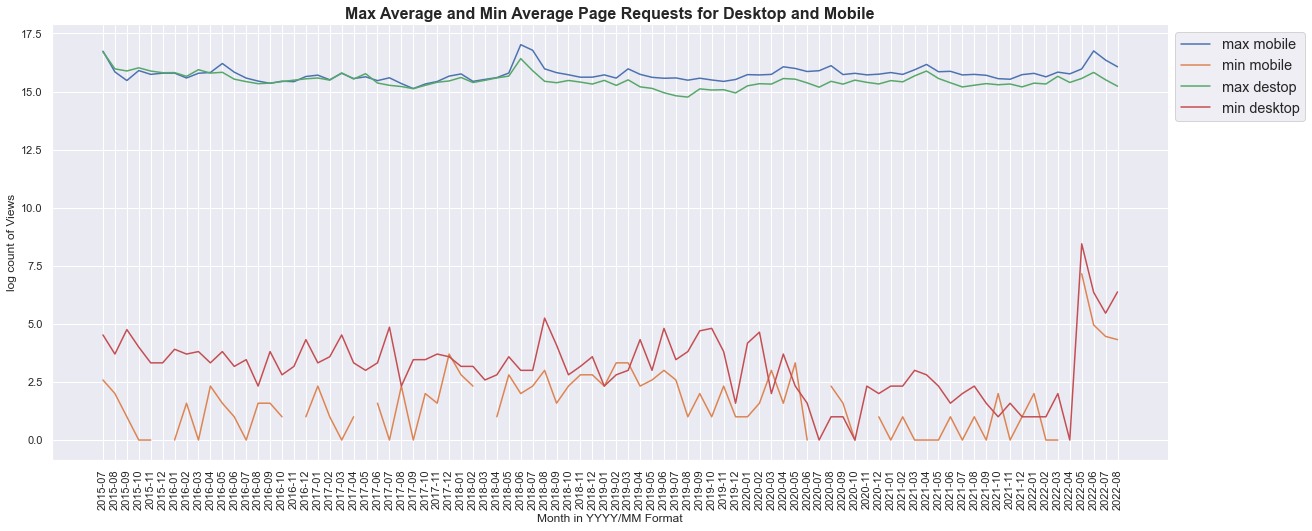

In [75]:
labels = ["max mobile","min mobile", "max destop", "min desktop"]
plt.figure(figsize = (20,8))
plt.plot(df_mobile_max_pageviews["date"],df_mobile_max_pageviews["log_views"])
plt.plot(df_mobile_min_pageviews["date"],df_mobile_min_pageviews["log_views"])
plt.plot(df_desktop_max_pageviews["date"],df_desktop_max_pageviews["log_views"])
plt.plot(df_desktop_min_pageviews["date"],df_desktop_min_pageviews["log_views"])
plt.title("Max Average and Min Average Page Requests for Desktop and Mobile",fontsize = 16, fontweight='bold')
plt.xlabel("Month in YYYY/MM Format")
plt.ylabel("log count of Views")
plt.legend(labels = labels, fontsize = "large", bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
sns.despine()
plt.show()

### Top 10 Peak Page Views 

In [58]:
# Get max views for each article
df_top_10_mobile = df_pageviews_mobile.groupby(['article'], as_index=False)['views'].max().nlargest(10, 'views').set_index('article')
df_top_10_desktop = df_pageviews_desktop.groupby(['article'], as_index=False)['views'].max().nlargest(10, 'views').set_index('article')

mobile_subset =  df_pageviews_mobile[df_pageviews_mobile['article'].isin(df_top_10_mobile.index)]
desktop_subset =  df_pageviews_desktop[df_pageviews_desktop['article'].isin(df_top_10_desktop.index)]

desktop_subset['access'] = '(desktop)'
desktop_subset['dino_access'] = desktop_subset['access']+ '' +desktop_subset['article']

mobile_subset['access'] = '(mobile)'
mobile_subset['dino_access'] = mobile_subset['access']+ '' +mobile_subset['article']

In [59]:
final_top_10 = pd.concat([desktop_subset, mobile_subset], axis =0)

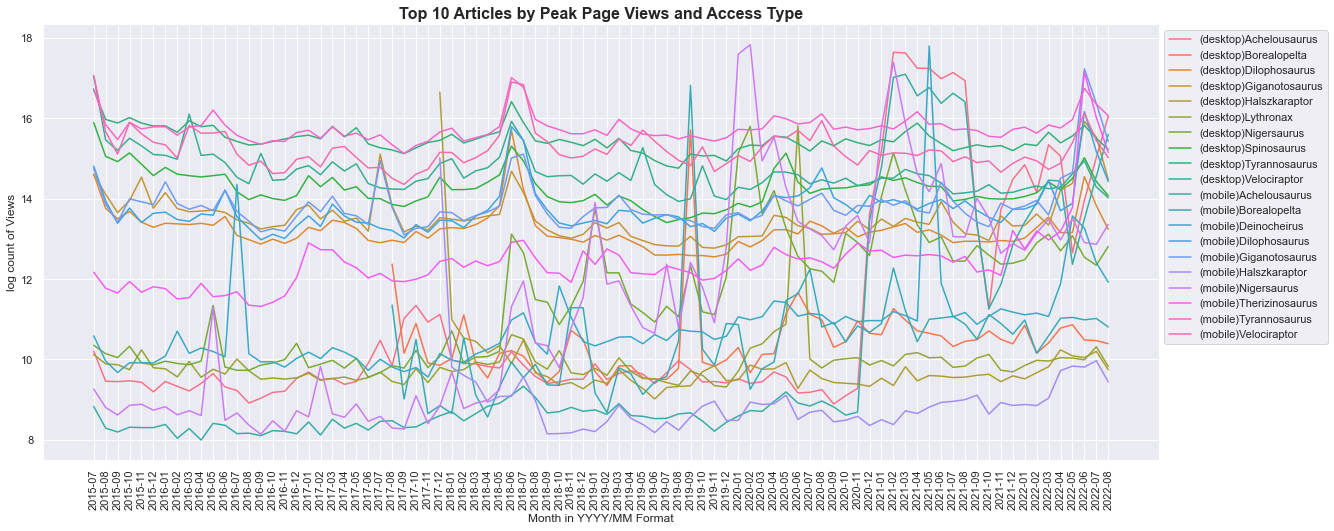

In [60]:
sns.set(rc={"figure.figsize":(20, 8)}) #width=20, height=8
ax = sns.lineplot(x='date', y='log_views', hue='dino_access', data=final_top_10,ci=None)
plt.title("Top 10 Articles by Peak Page Views and Access Type",fontsize = 16, fontweight='bold')
plt.xlabel("Month in YYYY/MM Format")
plt.ylabel("log count of Views")
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=90)
sns.despine()
plt.show()

### Fewest Months of Data

In [52]:
df_10_fewestmonths_mobile = df_pageviews_mobile.groupby(['article'])['views'].agg('count').reset_index().nsmallest(10, 'views').set_index('article')
df_10_fewestmonths_desktop = df_pageviews_desktop.groupby(['article'])['views'].agg('count').reset_index().nsmallest(10, 'views').set_index('article')

mobile_subset_fewest =  df_pageviews_mobile[df_pageviews_mobile['article'].isin(df_10_fewestmonths_mobile.index)]
desktop_subset_fewest =  df_pageviews_desktop[df_pageviews_desktop['article'].isin(df_10_fewestmonths_desktop.index)]

desktop_subset_fewest['access'] = '(desktop)'
desktop_subset_fewest['dino_access'] = desktop_subset_fewest['access']+ '' +desktop_subset_fewest['article']

mobile_subset_fewest['access'] = '(mobile)'
mobile_subset_fewest['dino_access'] = mobile_subset_fewest['access']+ '' +mobile_subset_fewest['article']

In [53]:
final_10_fewest_month = pd.concat([desktop_subset_fewest, mobile_subset_fewest], axis =0)

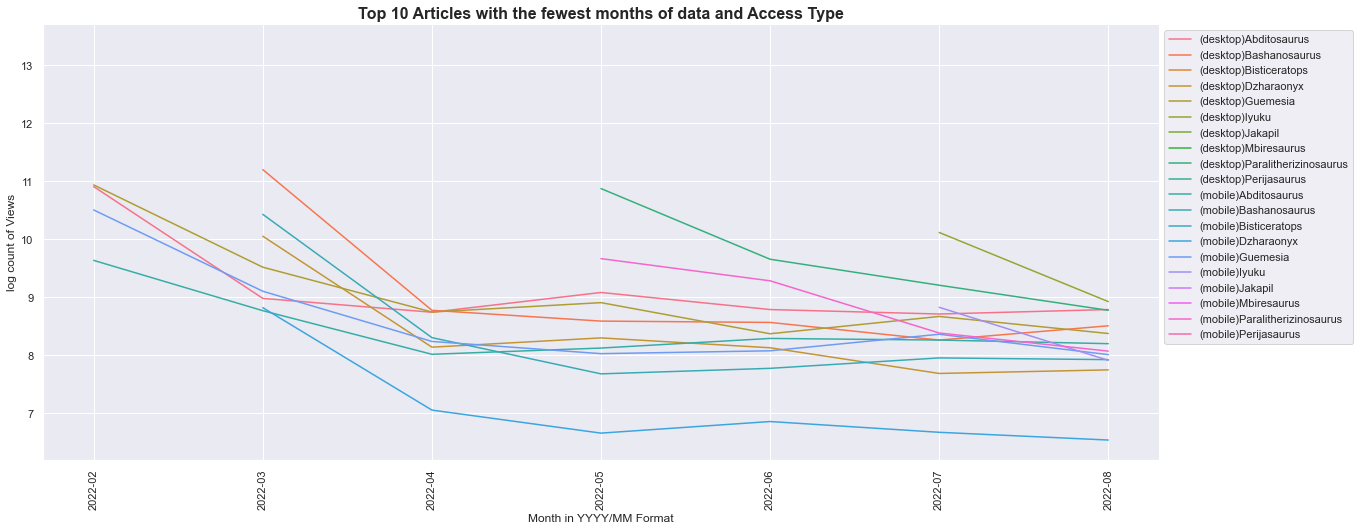

In [54]:
sns.set(rc={"figure.figsize":(20, 8)}) #width=20, height=8
ax = sns.lineplot(x='date', y='log_views', hue='dino_access', data=final_10_fewest_month,ci=None)
plt.title("Top 10 Articles with the fewest months of data and Access Type",fontsize = 16, fontweight='bold')
plt.xlabel("Month in YYYY/MM Format")
plt.ylabel("log count of Views")
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=90)
sns.despine()
plt.show()